In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('clean_resume_data_balanced.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x= df['Feature']
y= df['Category']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=50)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
tfid= TfidfVectorizer()

In [7]:
x_train_tfid= tfid.fit_transform(x_train)
x_test_tfid= tfid.transform(x_test)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model= LogisticRegression(solver='liblinear', multi_class='auto', C=15, penalty='l1')

In [10]:
model.fit(x_train_tfid, y_train)

LogisticRegression(C=15, penalty='l1', solver='liblinear')

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
y_pred= model.predict(x_test_tfid)
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.890625


from io import StringIO
 
StringData = StringIO(""" css linux scrum research django mysql engineering
    """)
 
x = pd.read_csv(StringData, sep =";")

test_tfid= tfid.transform(x)
y_pred= model.predict(test_tfid)
y_pred

In [13]:
y_pred= model.predict(x_test_tfid)
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.890625


In [14]:
from sklearn.metrics import classification_report


In [15]:
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.89      1.00      0.94        17
              ADVOCATE       0.76      0.90      0.83        21
           AGRICULTURE       0.95      1.00      0.97        18
               APPAREL       1.00      0.70      0.83        27
                  ARTS       0.93      0.86      0.89        29
            AUTOMOBILE       0.86      0.96      0.91        25
              AVIATION       1.00      0.79      0.89        34
               BANKING       0.96      0.88      0.92        26
                   BPO       1.00      0.81      0.89        21
  BUSINESS-DEVELOPMENT       0.72      0.78      0.75        27
                  CHEF       1.00      0.95      0.98        21
          CONSTRUCTION       0.96      0.96      0.96        25
            CONSULTANT       0.75      0.81      0.78        26
              DESIGNER       0.92      1.00      0.96        24
         DIGITAL-MEDIA       0.84      

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

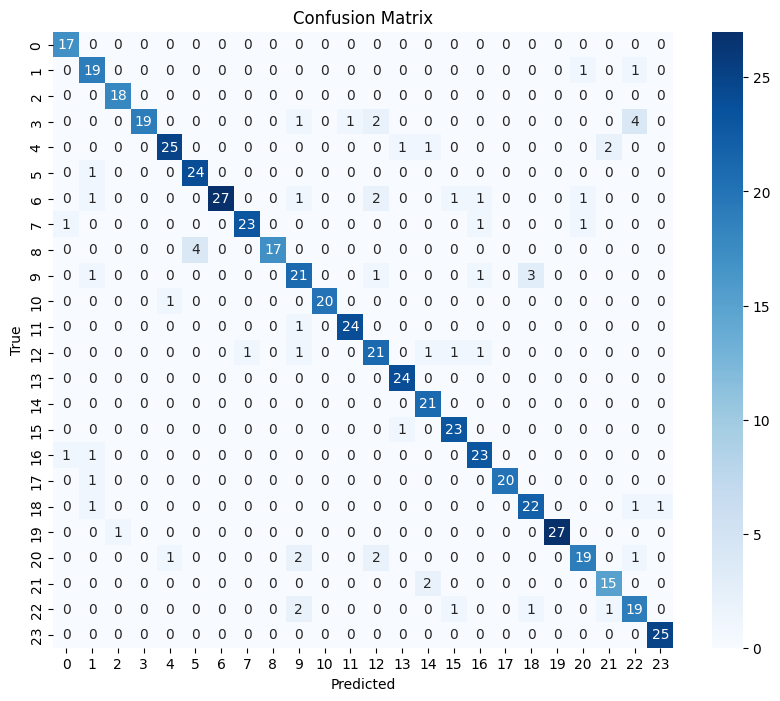

In [17]:
cm= confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import re

def cleanResume(txt):
    cleanText= re.sub('http\S+\s', ' ', txt)
    cleanText= re.sub('RT|cc', ' ', cleanText)
    cleanText= re.sub('#\S+\s', ' ', cleanText)
    cleanText= re.sub('@\S+', ' ', cleanText)
    cleanText= re.sub('[%s]' % re.escape("""!"#$%&()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText= re.sub(r'[^x00-\x7f]', ' ', cleanText)
    cleanText= re.sub('\s+', ' ', cleanText)
    return cleanText

In [25]:
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfid= tfid.transform([resume_text])
    predicted_category= model.predict(resume_tfid)[0]
    return predicted_category

In [27]:
resume_file= """Jane Doe
123 Creative Avenue, Design City, CA 90000
(123) 456-7890
jane.doe@example.com
Portfolio

Summary
Innovative and detail-oriented Graphic Designer with over 7 years of experience in creating compelling visual content. Proficient in Adobe Creative Suite, UX/UI design, and branding. Adept at collaborating with clients and cross-functional teams to deliver projects on time and within budget.

Experience
Senior Graphic Designer
Creative Solutions Agency, Design City, CA
January 2019 – Present

Lead the design team in creating visual content for clients, including logos, brochures, websites, and social media graphics.
Conducted UX/UI research and developed user-centered design solutions for web and mobile applications.
Collaborated with marketing and development teams to ensure cohesive brand identity across all platforms.
Managed multiple projects simultaneously, ensuring timely delivery and adherence to client specifications.
Mentored junior designers and provided constructive feedback to enhance team skills.
Graphic Designer
Innovative Designs Inc., Design City, CA
June 2015 – December 2018

Developed creative concepts and designs for various print and digital media.
Worked closely with clients to understand their vision and translate it into visual elements.
Created wireframes, prototypes, and mockups for web and mobile applications.
Assisted in the development of brand guidelines and ensured consistency across all marketing materials.
Participated in brainstorming sessions and contributed to the overall creative strategy.
Junior Graphic Designer
Design Studios, Design City, CA
July 2013 – May 2015

Assisted senior designers in creating visual content for client projects.
Edited and retouched photos for use in marketing materials.
Designed marketing collateral, including flyers, posters, and banners.
Conducted research on design trends and best practices to inform design decisions.
Supported the design team in maintaining an organized and efficient workflow.
Education
Bachelor of Fine Arts in Graphic Design
University of Design, Design City, CA
Graduated: May 2013

Skills
Design Software: Adobe Creative Suite (Photoshop, Illustrator, InDesign, XD), Sketch, Figma
UX/UI Design: Wireframing, Prototyping, User Research, Usability Testing
Web Design: HTML, CSS, WordPress, Responsive Design
Branding: Logo Design, Brand Identity, Visual Storytelling
Project Management: Agile Methodologies, Time Management, Client Communication
Other Skills: Typography, Illustration, Print Design, Photo Editing
Certifications
Certified UX Designer, Nielsen Norman Group, 2022
Adobe Certified Expert (ACE), Adobe Creative Cloud, 2021
Awards
Best Design Award, Creative Solutions Agency, 2020
Outstanding Designer of the Year, University of Design, 2013
Languages
English (Fluent)
Spanish (Conversational)"""

predicted_category= predict_category(resume_file)
print("Category:", predicted_category)

Category: DESIGNER


In [28]:
import pickle

In [30]:
pickle.dump(model, open('models/logistic_reg_model.pkl', 'wb'))
pickle.dump(tfid, open('models/tfidf_vectorizer_categorization.pkl', 'wb'))